# AMAZON PRODUCT REVIEW ANALYSIS PROJECT

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

## =================== PreProcessing on reviews data ===========================

In [2]:
import gzip
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
        
def getdf(path):
    i = 0
    df1 = {}
    for d in parse(path):
        df1[i] = d
        i = i+1
    return pd.DataFrame.from_dict(df1, orient='index')

  

In [3]:
grocery_review_df= getdf("C:/Users/vamsh/OneDrive/Desktop/NIIT/14.Capstone project(Amazon)/reviews_Grocery_and_Gourmet_Food.json.gz")
grocery_review_df.head()   

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,"[0, 0]","No sugar, no GMO garbage, no fillers that come...",5.0,Best vanilla I've ever had,1381449600,"10 11, 2013"
1,A31W38VGZAUUM4,0700026444,FIFA Lvr,"[1, 1]","This is my absolute, undisputed favorite tea r...",5.0,Terrific Tea!,1354752000,"12 6, 2012"
2,A3I0AV0UJX5OH0,1403796890,Alicia b,"[0, 0]",I ordered spongbob slippers and I got John Cen...,1.0,grrrrrrr,1385942400,"12 2, 2013"
3,A3QAAOLIXKV383,1403796890,"Danny K. Tilley ""Dan Tilley""","[0, 0]",The cart is fine and works for the purpose for...,3.0,Storage on Wheels Cart,1307836800,"06 12, 2011"
4,AB1A5EGHHVA9M,141278509X,CHelmic,"[1, 1]",This product by Archer Farms is the best drink...,5.0,The best drink mix,1332547200,"03 24, 2012"


In [4]:
grocery_review_df.shape

(1297156, 9)

In [5]:
grocery_review_df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      7299
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [6]:
grocery_review_df.dropna(inplace=True)

In [7]:
grocery_review_df = grocery_review_df.drop(['unixReviewTime'], axis=1)
grocery_review_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,"[0, 0]","No sugar, no GMO garbage, no fillers that come...",5.0,Best vanilla I've ever had,"10 11, 2013"
1,A31W38VGZAUUM4,0700026444,FIFA Lvr,"[1, 1]","This is my absolute, undisputed favorite tea r...",5.0,Terrific Tea!,"12 6, 2012"
2,A3I0AV0UJX5OH0,1403796890,Alicia b,"[0, 0]",I ordered spongbob slippers and I got John Cen...,1.0,grrrrrrr,"12 2, 2013"
3,A3QAAOLIXKV383,1403796890,"Danny K. Tilley ""Dan Tilley""","[0, 0]",The cart is fine and works for the purpose for...,3.0,Storage on Wheels Cart,"06 12, 2011"
4,AB1A5EGHHVA9M,141278509X,CHelmic,"[1, 1]",This product by Archer Farms is the best drink...,5.0,The best drink mix,"03 24, 2012"
...,...,...,...,...,...,...,...,...
1297151,A1DGBQQIBHTLPF,B00LOZ7F0S,Berkley Roberts,"[0, 0]",I was attracted to this product initially beca...,5.0,Great Appeal and Quality!,"07 17, 2014"
1297152,A3DYJ90MXMH04P,B00LOZ7F0S,Maximiliano Korp,"[1, 1]","Wonderful vanilla. Very strong vanilla flavor,...",5.0,Wonderful vanilla. Very strong vanilla flavor,"07 10, 2014"
1297153,AWQYAJV2QWLWA,B00LOZ7F0S,Micheal Taylor,"[0, 0]",I usually don't write reviews but this product...,5.0,The best I have found,"07 13, 2014"
1297154,A2AT0AI6QKSY2C,B00LOZ7F0S,Willy Korp,"[0, 0]","I like to drink my tea with vanilla extract, i...",5.0,Healthy product,"07 15, 2014"


In [8]:
grocery_review_df.drop_duplicates(subset=['reviewText'],keep='first',inplace=True)

In [9]:
grocery_review_df.isnull().sum()

reviewerID      0
asin            0
reviewerName    0
helpful         0
reviewText      0
overall         0
summary         0
reviewTime      0
dtype: int64

In [10]:
grocery_review_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,"[0, 0]","No sugar, no GMO garbage, no fillers that come...",5.0,Best vanilla I've ever had,"10 11, 2013"
1,A31W38VGZAUUM4,0700026444,FIFA Lvr,"[1, 1]","This is my absolute, undisputed favorite tea r...",5.0,Terrific Tea!,"12 6, 2012"
2,A3I0AV0UJX5OH0,1403796890,Alicia b,"[0, 0]",I ordered spongbob slippers and I got John Cen...,1.0,grrrrrrr,"12 2, 2013"
3,A3QAAOLIXKV383,1403796890,"Danny K. Tilley ""Dan Tilley""","[0, 0]",The cart is fine and works for the purpose for...,3.0,Storage on Wheels Cart,"06 12, 2011"
4,AB1A5EGHHVA9M,141278509X,CHelmic,"[1, 1]",This product by Archer Farms is the best drink...,5.0,The best drink mix,"03 24, 2012"


## ====================SENTIMENT ANALYSIS============================

In [11]:
import re

def cleaning(text):
    text=re.sub(r'[,!*£()+.?]',' ',text) 
    text=''.join([i for i in text if not i.isdigit()])## used to remove the numerical values
    text=' '.join(text.split()) ## use to remove the extra space
    text=re.sub(r'[,.+£"#;:''@=//]','',text) ## use to remove the special characters
    text=re.sub('-(?!\w)','',text) ## removes hyphon
    text=re.sub(r'[^\w\s]','',text) ## removes the punctuations 
    text=re.sub(r"\\b(\\w+)(?:\\W+\\1\\b)+",'',text) #removes the repeted words
    text=text.lower()

    return text

In [12]:
grocery_review_df['reviewText']=grocery_review_df['reviewText'].apply(cleaning)
grocery_review_df['summary']=grocery_review_df['summary'].apply(cleaning)
grocery_review_df['reviewerName']=grocery_review_df['reviewerName'].apply(cleaning)

In [13]:
grocery_review_df['reviewText']=grocery_review_df['reviewText'].astype(str)

In [14]:
## CONCATENATE REVIEWTEXT AND SUMMARY 

grocery_review_df['review_text'] = grocery_review_df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
grocery_review_df1 = grocery_review_df.drop(['reviewText', 'summary'], axis = 1)
grocery_review_df1.head()

,reviewerID,asin,reviewerName,helpful,overall,reviewTime,review_text
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,"[0, 0]",5.0,"10 11, 2013",best vanilla ive ever had no sugar no gmo garb...
1,A31W38VGZAUUM4,0700026444,fifa lvr,"[1, 1]",5.0,"12 6, 2012",terrific tea this is my absolute undisputed fa...
2,A3I0AV0UJX5OH0,1403796890,alicia b,"[0, 0]",1.0,"12 2, 2013",grrrrrrr i ordered spongbob slippers and i got...
3,A3QAAOLIXKV383,1403796890,danny k tilley dan tilley,"[0, 0]",3.0,"06 12, 2011",storage on wheels cart the cart is fine and wo...
4,AB1A5EGHHVA9M,141278509X,chelmic,"[1, 1]",5.0,"03 24, 2012",the best drink mix this product by archer farm...


In [15]:
# Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end
list_positive = []
list_negative = []

for help in grocery_review_df1['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
grocery_review_df1['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
grocery_review_df1['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
grocery_review_df1 = grocery_review_df1.drop('helpful', axis = 1)
grocery_review_df1.head()


,reviewerID,asin,reviewerName,overall,reviewTime,review_text,pos_feedback,neg_feedback
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,5.0,"10 11, 2013",best vanilla ive ever had no sugar no gmo garb...,0,0
1,A31W38VGZAUUM4,0700026444,fifa lvr,5.0,"12 6, 2012",terrific tea this is my absolute undisputed fa...,1,0
2,A3I0AV0UJX5OH0,1403796890,alicia b,1.0,"12 2, 2013",grrrrrrr i ordered spongbob slippers and i got...,0,0
3,A3QAAOLIXKV383,1403796890,danny k tilley dan tilley,3.0,"06 12, 2011",storage on wheels cart the cart is fine and wo...,0,0
4,AB1A5EGHHVA9M,141278509X,chelmic,5.0,"03 24, 2012",the best drink mix this product by archer farm...,1,0


In [16]:
# Classify ratings as good
good = len(grocery_review_df1[grocery_review_df1['overall'] >= 3])
bad = len(grocery_review_df1[grocery_review_df1['overall'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} '.format(good))
print ('Bad ratings : {}'.format(bad))

# Apply the new classification to the ratings column
grocery_review_df1['rating_class'] = grocery_review_df1['overall'].apply(lambda x: 'bad' if x < 3 else 'good')
grocery_review_df1.head()

Good ratings : 1124190 
Bad ratings : 163651


,reviewerID,asin,reviewerName,overall,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,5.0,"10 11, 2013",best vanilla ive ever had no sugar no gmo garb...,0,0,good
1,A31W38VGZAUUM4,0700026444,fifa lvr,5.0,"12 6, 2012",terrific tea this is my absolute undisputed fa...,1,0,good
2,A3I0AV0UJX5OH0,1403796890,alicia b,1.0,"12 2, 2013",grrrrrrr i ordered spongbob slippers and i got...,0,0,bad
3,A3QAAOLIXKV383,1403796890,danny k tilley dan tilley,3.0,"06 12, 2011",storage on wheels cart the cart is fine and wo...,0,0,good
4,AB1A5EGHHVA9M,141278509X,chelmic,5.0,"03 24, 2012",the best drink mix this product by archer farm...,1,0,good


In [17]:
import nltk
from nltk.stem import WordNetLemmatizer

In [18]:
def tokenize(column):
    #Tokenizes a Pandas dataframe column and returns a list of tokens.
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.islower()]  

grocery_review_df1['tokenized'] = grocery_review_df1['review_text'].apply(tokenize)
grocery_review_df1[['tokenized']].head()

,tokenized
0,"[best, vanilla, ive, ever, had, no, sugar, no,..."
1,"[terrific, tea, this, is, my, absolute, undisp..."
2,"[grrrrrrr, i, ordered, spongbob, slippers, and..."
3,"[storage, on, wheels, cart, the, cart, is, fin..."
4,"[the, best, drink, mix, this, product, by, arc..."


In [19]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [20]:
grocery_review_df1['tokenized'] = grocery_review_df1['tokenized'].apply(lambda w: [w for w in w if w not in stop_words])

In [21]:
#!pip install textblob

In [21]:
from textblob import TextBlob
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# Polarity – talks about how positive or negative the opinion is
## Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 0 #negative
    elif score == 0:
        return 2 #neutral
    else:
        return 1 #positive

In [22]:
grocery_review_df1['tokenized'] = grocery_review_df1['tokenized'].astype(str)

In [23]:
grocery_review_df1['Polarity'] = grocery_review_df1['tokenized'].apply(getPolarity) 

In [24]:
grocery_review_df1[['Polarity']]

,Polarity
0,0.195578
1,0.236842
2,0.200000
3,0.058333
4,0.487755
...,...
1297151,0.275000
1297152,0.500000
1297153,0.451429
1297154,0.532000


In [25]:
def sentiment(score):
    if score < 0:
        return 'Negative' 
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
grocery_review_df1['Sentiment'] = grocery_review_df1['Polarity'].apply(analysis)
grocery_review_df1['Sentiment'].value_counts()


1    1154667
0     114561
2      18613
Name: Sentiment, dtype: int64

In [27]:
grocery_review_df1['Sentiment_Analysis'] = grocery_review_df1['Polarity'].apply(sentiment)
grocery_review_df1['Sentiment_Analysis'].value_counts()

Positive    1154667
Negative     114561
Neutral       18613
Name: Sentiment_Analysis, dtype: int64

In [28]:
from nltk import FreqDist

freq_dist_pos = FreqDist(grocery_review_df1['tokenized'])
freq_dist_pos.most_common(100)

[("['five', 'stars', 'love']", 67),
 ("['five', 'stars', 'good']", 49),
 ("['five', 'stars', 'great']", 31),
 ("['five', 'stars', 'delicious']", 25),
 ("['five', 'stars', 'best']", 18),
 ("['three', 'stars', 'ok']", 18),
 ("['five', 'stars', 'great', 'product']", 16),
 ("['five', 'stars', 'yummy']", 16),
 ("['five', 'stars', 'loved']", 15),
 ("['five', 'stars', 'love', 'coffee']", 15),
 ("['five', 'stars', 'awesome']", 14),
 ("['five', 'stars', 'love', 'stuff']", 12),
 ("['five', 'stars', 'excellent']", 12),
 ("['five', 'stars', 'great', 'coffee']", 12),
 ("['five', 'stars', 'favorite']", 12),
 ("['five', 'stars', 'love', 'love', 'love']", 12),
 ("['five', 'stars', 'tasty']", 11),
 ("['five', 'stars', 'good', 'stuff']", 10),
 ("['five', 'stars', 'like']", 10),
 ("['five', 'stars', 'good', 'coffee']", 10),
 ("['five', 'stars', 'perfect']", 9),
 ("['five', 'stars']", 9),
 ("['five', 'stars', 'taste', 'good']", 9),
 ("['five', 'stars', 'best', 'ever']", 9),
 ("['five', 'stars', 'good', 'p

In [29]:
# Convert time object to datetime and create a new column named 'time'
grocery_review_df1['Time'] = grocery_review_df1.reviewTime.str.replace(',', "")
grocery_review_df1['Time'] = pd.to_datetime(grocery_review_df1['Time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
grocery_review_df1 = grocery_review_df1.drop('reviewTime', axis = 1)

### Testing model on sentiments

In [30]:
# #split data-set to train and test
from sklearn.model_selection import train_test_split

X = grocery_review_df1['review_text']
Y = grocery_review_df1['Sentiment_Analysis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(sublinear_tf=True, #apply sublinear tf scaling ,i.e replace tf with 1+log(tf)
                           max_df=0.5,      # ignore terms that appear in morethan that fraction of docs
                           min_df=1,
                           stop_words=stopwords.words("english"),
                           use_idf=True,   #enable inverse-documents-frequency reweighting
                           smooth_idf=True  #smooth idf weights by adding one to document frequencies
                          )

In [32]:
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(X_train_vect, Y_train)

LogisticRegression()

In [37]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
lr_predictions = lr.predict(X_test_vect)
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
Negative,0.940000,0.880000,0.910000,22971.000000
Neutral,0.930000,0.650000,0.770000,3679.000000
Positive,0.980000,1.000000,0.990000,230919.000000
accuracy,0.980000,0.980000,0.980000,0.980000
macro avg,0.950000,0.840000,0.890000,257569.000000
weighted avg,0.980000,0.980000,0.980000,257569.000000


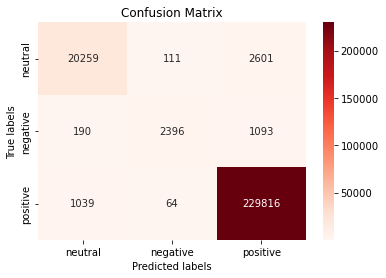

In [38]:
# confusion matrix
lr_predictions=lr.predict(X_test_vect)
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neutral','negative', 'positive']); ax.yaxis.set_ticklabels(['neutral','negative', 'positive']);

#### Positive feedback has a higher precision and F1 score while running through a logistic regression model; which indicates that the grocery products have a higher segment of satisfied customers.


In [39]:
# testing the model with sample 'Negative' review
demo_review = np.array(['very disappointed'])
demo_review_X_test = vectorizer.transform(demo_review)
print(lr.predict(demo_review_X_test))

# expected output = Negative
# actual output = Negative

['Negative']


#### Model tests correct on negative feedback. 

In [40]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['best vanilla ive ever had'])
demo_review_X_test_2 = vectorizer.transform(demo_review_2)
print(lr.predict(demo_review_X_test_2))

# expected output = Positive
# actual output = Positive

['Positive']


#### Model tests correct on positive feedback.

In [41]:
# testing the model with sample 'Neutral' review
demo_review_3 = np.array(['not a fan'])
demo_review_X_test_3 = vectorizer.transform(demo_review_3)
print(lr.predict(demo_review_X_test_3))

# expected output = Neutral
# actual output = Neutral

['Neutral']


#### Model tests correct on neutral feedback.

In [42]:
### Total reviews
total = len(grocery_review_df1['review_text'])
print ("Number of reviews: ",total)

### How many unique reviewes
print ("Number of unique reviewes: ",len(grocery_review_df1.review_text.unique()))

### How many unique products?
print ("Number of unique products: ", len(grocery_review_df1.asin.unique()))

Number of reviews:  1287841
Number of unique reviewes:  1286621
Number of unique products:  165761


## Sentiment Analysis on reviews given by customers:
sentiment of customers are segmented into positive negative neutral on the basis of reviews
###    It can be observed that Amazon has higher positive feedback towards its grocery and gourmet food section.
###    Customer can be segmented here after on the basis of the sentiment.


## =================== PreProcessing on metadata ===========================

In [114]:
grocery_meta_df = getdf("C:/Users/vamsh/OneDrive/Desktop/NIIT/14.Capstone project(Amazon)/meta_Grocery_and_Gourmet_Food.json.gz")
grocery_meta_df.head()

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,NaN
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,NaN
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,NaN
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,NaN
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio


In [248]:
grocery_meta_df1 = grocery_meta_df.copy()

In [249]:
grocery_meta_df1.brand.isnull()

0          True
1          True
2          True
3          True
4         False
          ...  
171755     True
171756     True
171757     True
171758     True
171759     True
Name: brand, Length: 171760, dtype: bool

In [250]:
grocery_meta_df1.loc[grocery_meta_df1.brand.isnull(),'brand'] = grocery_meta_df1.title.str.split().str.get(0)

In [251]:
grocery_meta_df1

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,100
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,Pure
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,WWE
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,Archer
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio
...,...,...,...,...,...,...,...,...,...
171755,B00LDXFI6Y,Nescafe Cafe Viet is extracted from the aromat...,Nescafe Cafe Viet Vietnamese Sweetened Instant...,http://ecx.images-amazon.com/images/I/51qAGS7j...,{'also_viewed': ['B000DN8EZW']},NaN,[[Grocery & Gourmet Food]],17.99,Nescafe
171756,B00LMMLRG6,Moon Cheese Snacks Moon Cheese High in protein...,"Moon Cheese, 2 Oz. Pack of Three (Assortment)",http://ecx.images-amazon.com/images/I/419FO438...,{'also_viewed': ['B000UPFWW6']},{'Grocery & Gourmet Food': 54090},[[Grocery & Gourmet Food]],16.95,Moon
171757,B00LOXAZ1Q,Sour Punch candy is the brand of mouth waterin...,"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",http://ecx.images-amazon.com/images/I/31Cj3cHD...,NaN,{'Grocery & Gourmet Food': 133517},[[Grocery & Gourmet Food]],16.55,Sour
171758,B00LOZ7F0S,"Our Vanilla Extract made from\nPremium, Organi...",Organic Mexican Vanilla,http://ecx.images-amazon.com/images/I/11iORwy7...,NaN,NaN,[[Grocery & Gourmet Food]],NaN,Organic


In [252]:
grocery_meta_df1.dtypes

asin            object
description     object
title           object
imUrl           object
related         object
salesRank       object
categories      object
price          float64
brand           object
dtype: object

In [253]:
grocery_meta_df1.isnull().sum()

asin               0
description    19943
title            158
imUrl            144
related        44490
salesRank      14788
categories         0
price          58608
brand            158
dtype: int64

In [254]:
grocery_meta_df1['title'] = grocery_meta_df1['title'].astype(str)
grocery_meta_df1['brand'] = grocery_meta_df1['brand'].astype(str)

In [255]:
grocery_meta_df1['product_name']=[a.replace(b,'').strip() for a,b in zip(grocery_meta_df1['title'], grocery_meta_df1['brand'])]

In [256]:
grocery_meta_df1.head()

,asin,description,title,imUrl,related,salesRank,categories,price,brand,product_name
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,100,Percent All Natural Vanilla Extract
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,Pure,Darjeeling Tea: Loose Leaf
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,WWE,Kids Todler Velvet Slippers featuring John Cen...
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,Archer,Farms Strawberry Dragonfruit Drink Mix 8-0.16 ...
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio,Energy Liquid Water Enhancer Black Cherry &amp...


In [257]:
grocery_meta_df2 = grocery_meta_df1.copy()

In [258]:
grocery_meta_df2.drop(['description','title','imUrl','related','salesRank'],axis=1,inplace=True)

In [259]:
grocery_meta_df2['product_name']=grocery_meta_df2['product_name'].apply(cleaning)

In [260]:
#coverting categories column to string type for text cleaning
grocery_meta_df2["categories"] = grocery_meta_df2["categories"].astype(str)

In [261]:
grocery_meta_df2["categories"] = grocery_meta_df2["categories"].str.replace("[\]\[]",'')

In [262]:
grocery_meta_df2["categories"]=grocery_meta_df2["categories"].apply(cleaning)

In [263]:
grocery_meta_df2.head()

,asin,categories,price,brand,product_name
0,0657745316,grocery gourmet food,NaN,100,percent all natural vanilla extract
1,0700026444,grocery gourmet food,NaN,Pure,darjeeling tea loose leaf
2,1403796890,grocery gourmet food,3.99,WWE,kids todler velvet slippers featuring john cen...
3,141278509X,grocery gourmet food,NaN,Archer,farms strawberry dragonfruit drink mix oz pac...
4,1453060375,grocery gourmet food,11.99,Mio,energy liquid water enhancer black cherry amp ...


In [264]:
grocery_meta_df2.rename(columns={'asin':'productID'},inplace=True)

In [265]:
grocery_meta_df2.dtypes

productID        object
categories       object
price           float64
brand            object
product_name     object
dtype: object

In [266]:
cols = ['categories','brand']

In [267]:
for i in cols:
    grocery_meta_df2[i] = grocery_meta_df2[i].astype('category')

In [268]:
from sklearn.preprocessing import LabelEncoder

In [269]:
price_nulldf = grocery_meta_df2[grocery_meta_df2.price.isnull()]

In [270]:
price_nonull = grocery_meta_df2.dropna(subset='price')

In [271]:
#taking target and independent sets
x = price_nonull.drop(columns=['price','productID','product_name'])
y = price_nonull['price']
x1 = price_nulldf.drop(columns=['price','productID','product_name'])

In [272]:
#encoding the categorical column to numerical
encoder = LabelEncoder()

x['categories']=encoder.fit_transform(x['categories'])
x['brand']=encoder.fit_transform(x['brand'])


x1['categories']=encoder.fit_transform(x1['categories'])
x1['brand']=encoder.fit_transform(x1['brand'])

In [273]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x,y)
pred_r=model.predict(x1)
pred_r

array([25.36141229, 24.33636543, 25.28105739, ..., 24.71009402,
       24.42924318, 24.49929283])

In [274]:
price_nulldf['price'] = pred_r

In [275]:
price=pd.concat([price_nulldf,price_nonull],axis=0)
price.head()

,productID,categories,price,brand,product_name
0,0657745316,grocery gourmet food,25.361412,100,percent all natural vanilla extract
1,0700026444,grocery gourmet food,24.336365,Pure,darjeeling tea loose leaf
3,141278509X,grocery gourmet food,25.281057,Archer,farms strawberry dragonfruit drink mix oz pac...
6,1453060464,grocery gourmet food,24.172264,Splash,energy liquid water enhancer servings fantasy ...
13,5628754218,grocery gourmet food,24.742836,Iaso,tea original by total life changes and dr mill...


In [276]:
grocery_meta_df2['price']=price['price']
grocery_meta_df2

,productID,categories,price,brand,product_name
0,0657745316,grocery gourmet food,25.361412,100,percent all natural vanilla extract
1,0700026444,grocery gourmet food,24.336365,Pure,darjeeling tea loose leaf
2,1403796890,grocery gourmet food,3.990000,WWE,kids todler velvet slippers featuring john cen...
3,141278509X,grocery gourmet food,25.281057,Archer,farms strawberry dragonfruit drink mix oz pac...
4,1453060375,grocery gourmet food,11.990000,Mio,energy liquid water enhancer black cherry amp ...
...,...,...,...,...,...
171755,B00LDXFI6Y,grocery gourmet food,17.990000,Nescafe,cafe viet vietnamese sweetened instant black c...
171756,B00LMMLRG6,grocery gourmet food,16.950000,Moon,cheese oz pack of three assortment
171757,B00LOXAZ1Q,grocery gourmet food,16.550000,Sour,punch blue raspberry bite ounce bag per case
171758,B00LOZ7F0S,grocery gourmet food,24.429243,Organic,mexican vanilla


In [285]:
grocery_meta_df3 = grocery_meta_df2.copy()

In [286]:
grocery_meta_df3['product_name'] = grocery_meta_df3['product_name'].astype(str)

In [287]:
grocery_meta_df3['product_name1'] = grocery_meta_df3.product_name.split().str.get(0)

AttributeError: 'Series' object has no attribute 'split'

In [288]:
grocery_meta_df3.head()

,productID,categories,price,brand,product_name
0,0657745316,grocery gourmet food,25.361412,100,percent all natural vanilla extract
1,0700026444,grocery gourmet food,24.336365,Pure,darjeeling tea loose leaf
2,1403796890,grocery gourmet food,3.990000,WWE,kids todler velvet slippers featuring john cen...
3,141278509X,grocery gourmet food,25.281057,Archer,farms strawberry dragonfruit drink mix oz pac...
4,1453060375,grocery gourmet food,11.990000,Mio,energy liquid water enhancer black cherry amp ...


In [ ]:
grocery_meta_df2['product_name1'] = grocery_meta_df2.product_name.str.get(1)

In [ ]:
grocery_meta_df2['product_name1'] = grocery_meta_df2.product_name.str.get(2)

In [197]:
grocery_meta_df2.rename(columns={'productID':'asin'},inplace=True)

## =========================== Final data ================================
     After pre processing the final dataset has been saved on device and will be used for further anaylsis.

### Merging metadata and review dataframes for one final dataframe

In [198]:
grocery_df = grocery_meta_df2.merge(grocery_review_df1, how='inner')
grocery_df 

,asin,categories,price,brand,product_name,reviewerID,reviewerName,overall,review_text,pos_feedback,neg_feedback,rating_class,tokenized,Polarity,Sentiment,Sentiment_Analysis,Time
0,0657745316,grocery gourmet food,25.361412,100,percent all natural vanilla extract,A1ZQZ8RJS1XVTX,gsxrgirl,5.0,best vanilla ive ever had no sugar no gmo garb...,0,0,good,"['best', 'vanilla', 'ive', 'ever', 'sugar', 'g...",0.195578,1,Positive,2013-10-11
1,0700026444,grocery gourmet food,24.336365,Pure,darjeeling tea loose leaf,A31W38VGZAUUM4,fifa lvr,5.0,terrific tea this is my absolute undisputed fa...,1,0,good,"['terrific', 'tea', 'absolute', 'undisputed', ...",0.236842,1,Positive,2012-12-06
2,1403796890,grocery gourmet food,3.990000,WWE,kids todler velvet slippers featuring john cen...,A3I0AV0UJX5OH0,alicia b,1.0,grrrrrrr i ordered spongbob slippers and i got...,0,0,bad,"['grrrrrrr', 'ordered', 'spongbob', 'slippers'...",0.200000,1,Positive,2013-12-02
3,1403796890,grocery gourmet food,3.990000,WWE,kids todler velvet slippers featuring john cen...,A3QAAOLIXKV383,danny k tilley dan tilley,3.0,storage on wheels cart the cart is fine and wo...,0,0,good,"['storage', 'wheels', 'cart', 'cart', 'fine', ...",0.058333,1,Positive,2011-06-12
4,141278509X,grocery gourmet food,25.281057,Archer,farms strawberry dragonfruit drink mix oz pac...,AB1A5EGHHVA9M,chelmic,5.0,the best drink mix this product by archer farm...,1,0,good,"['best', 'drink', 'mix', 'product', 'archer', ...",0.487755,1,Positive,2012-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287836,B00LOZ7F0S,grocery gourmet food,24.429243,Organic,mexican vanilla,A1DGBQQIBHTLPF,berkley roberts,5.0,great appeal and quality i was attracted to th...,0,0,good,"['great', 'appeal', 'quality', 'attracted', 'p...",0.275000,1,Positive,2014-07-17
1287837,B00LOZ7F0S,grocery gourmet food,24.429243,Organic,mexican vanilla,A3DYJ90MXMH04P,maximiliano korp,5.0,wonderful vanilla very strong vanilla flavor w...,1,0,good,"['wonderful', 'vanilla', 'strong', 'vanilla', ...",0.500000,1,Positive,2014-07-10
1287838,B00LOZ7F0S,grocery gourmet food,24.429243,Organic,mexican vanilla,AWQYAJV2QWLWA,micheal taylor,5.0,the best i have found i usually dont write rev...,0,0,good,"['best', 'found', 'usually', 'dont', 'write', ...",0.451429,1,Positive,2014-07-13
1287839,B00LOZ7F0S,grocery gourmet food,24.429243,Organic,mexican vanilla,A2AT0AI6QKSY2C,willy korp,5.0,healthy product i like to drink my tea with va...,0,0,good,"['healthy', 'product', 'like', 'drink', 'tea',...",0.532000,1,Positive,2014-07-15


In [199]:
grocery_df.rename(columns={'asin':'productID'},inplace=True)

In [200]:
grocery_df.shape

(1287841, 17)

In [201]:
grocery_df.isnull().sum()

productID             0
categories            0
price                 0
brand                 0
product_name          0
reviewerID            0
reviewerName          0
overall               0
review_text           0
pos_feedback          0
neg_feedback          0
rating_class          0
tokenized             0
Polarity              0
Sentiment             0
Sentiment_Analysis    0
Time                  0
dtype: int64

In [202]:
grocery_df.dtypes

productID                     object
categories                  category
price                        float64
brand                       category
product_name                  object
reviewerID                    object
reviewerName                  object
overall                      float64
review_text                   object
pos_feedback                   int64
neg_feedback                   int64
rating_class                  object
tokenized                     object
Polarity                     float64
Sentiment                      int64
Sentiment_Analysis            object
Time                  datetime64[ns]
dtype: object

#### Saving file to local device 


In [205]:
grocery_df.to_csv("C:/Users/vamsh/OneDrive/Desktop/NIIT/14.Capstone project(Amazon)/AmazonGroceryReview_csvfile_new.csv", sep = ',', encoding='utf-8', index = False)

In [206]:
grocery_df.to_json('C:/Users/vamsh/OneDrive/Desktop/NIIT/14.Capstone project(Amazon)/AmazonGroceryReview_jsonfile_new.json',orient = 'split',date_format='iso', index = 'true')

In [85]:
grocery_df.to_json('C:/Users/vamsh/OneDrive/Desktop/NIIT/14.Capstone project(Amazon)/AmazonGroceryReview_jsonfile_final.json',orient = 'split',date_format='iso', index = 'true')

In [86]:
#grocery_df.to_csv('C:\\Users\\iapar\\OneDrive\\Desktop\\Capstone\\AmazonGroceryReview_csvfile..csv', sep=',', encoding='utf-8', index = False)

In [2]:
import pandas as pd

In [4]:
g_df = pd.read_json("C:/Users/vamsh/OneDrive/Desktop/NIIT/14.Capstone project(Amazon)/AmazonGroceryReview_jsonfile_final.json",orient='split')

In [5]:
g_df.to_csv("C:/Users/vamsh/OneDrive/Desktop/NIIT/14.Capstone project(Amazon)/AmazonGroceryReview_csvfile_final.csv", sep=',', encoding='utf-8', index = False)